In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

假设 Y 和 X 的关系是$Y = \beta_{0} + \beta_{1}X + \epsilon$，如果不考虑这个$\epsilon$，次数高的多项式函数（模型）肯定可以表示这个一次函数的，只要相应的系数为0就可以了，次数高的函数都变成了真正的Y和X的一次函数，那不就训练误差也是0，测试误差也是0。不过这句话，在次数比较低的情况下是对的；次数高了之后就有变化了。你可以把下面的代码注释掉，重新运行下面所有的代码，看一下结果。
如果考虑这个$\epsilon$的，那就假设这个是标准正太分布，我们就加一个随机噪声。下面的结果是加了这个随机噪声的。
至于结论，你自己来把。

(100,)


Text(0.5, 0, 'X')

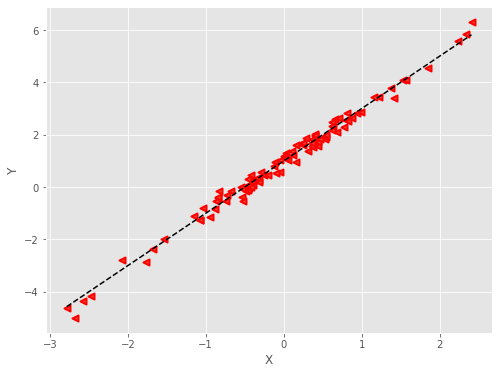

In [2]:
# 假设X和Y的关系是 Y = 2X + 1
X = np.random.normal(size=100)
print(np.unique(X).shape)  # 100个不同的值
Y = 2 * X + 1

Y = Y + np.random.normal(size=100) * 0.2  # 加噪声（epsilon），可以注释掉，看一下不加的情况

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, edgecolors="r", marker="<", linewidths=2)
a = np.linspace(X.min(), X.max(), 200)
plt.plot(a, 2 * a + 1, 'k--')
plt.ylabel("Y")
plt.xlabel("X")

In [3]:
X = X.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [4]:
# 线性模型
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_train_pred = l_model.predict(X_train)
y_test_pred = l_model.predict(X_test)
print("train error = %f" % mean_squared_error(y_pred=y_train_pred,y_true=y_train))
print("test error = %f" % mean_squared_error(y_pred=y_test_pred,y_true=y_test))

train error = 0.039351
test error = 0.053415


In [5]:
# 二次模型
X_train_q =  np.hstack((X_train, X_train ** 2))
X_test_q = np.hstack((X_test, X_test ** 2))

q_model = LinearRegression()
q_model.fit(X_train_q, y_train)
y_train_pred = q_model.predict(X_train_q)
y_test_pred = q_model.predict(X_test_q)
print("train error = %f" % mean_squared_error(y_pred=y_train_pred,y_true=y_train))
print("test error = %f" % mean_squared_error(y_pred=y_test_pred,y_true=y_test))

train error = 0.039343
test error = 0.053694


In [6]:
# 三次模型
X_train_c =  np.hstack((X_train, X_train ** 2, X_train ** 3))
X_test_c = np.hstack((X_test, X_test ** 2, X_test ** 3))

c_model = LinearRegression()
c_model.fit(X_train_c, y_train)
y_train_pred = c_model.predict(X_train_c)
y_test_pred = c_model.predict(X_test_c)
print("train error = %f" % mean_squared_error(y_pred=y_train_pred,y_true=y_train))
print("test error = %f" % mean_squared_error(y_pred=y_test_pred,y_true=y_test))

train error = 0.036842
test error = 0.049958


Text(0.5, 0, 'X')

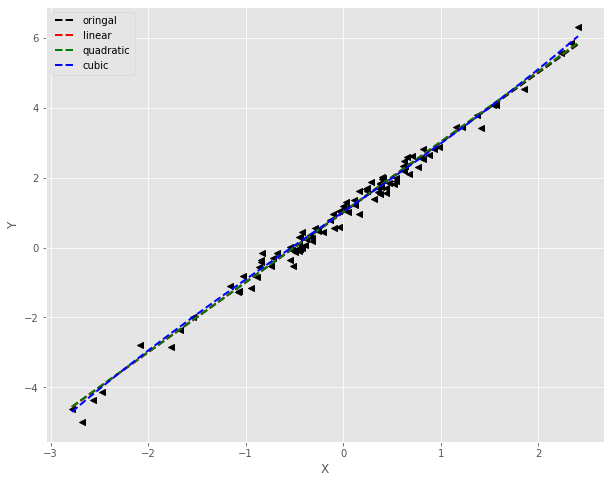

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y,c='k', marker="<", linewidths=1)
a = np.linspace(X.min(), X.max(), 200)
plt.plot(a, 2 * a + 1, 'k--',linewidth=2)

a = a.reshape((-1, 1))
y_l = l_model.predict(a)
plt.plot(a, y_l, 'r--',linewidth = 2)

y_q = q_model.predict(np.hstack((a, a ** 2)))
plt.plot(a, y_q, 'g--',linewidth = 2)

y_c = c_model.predict(np.hstack((a, a**2, a**3)))
plt.plot(a, y_c, 'b--',linewidth = 2)
plt.legend(["oringal","linear","quadratic","cubic"])
plt.ylabel("Y")
plt.xlabel("X")

注意y轴刻度的数量级


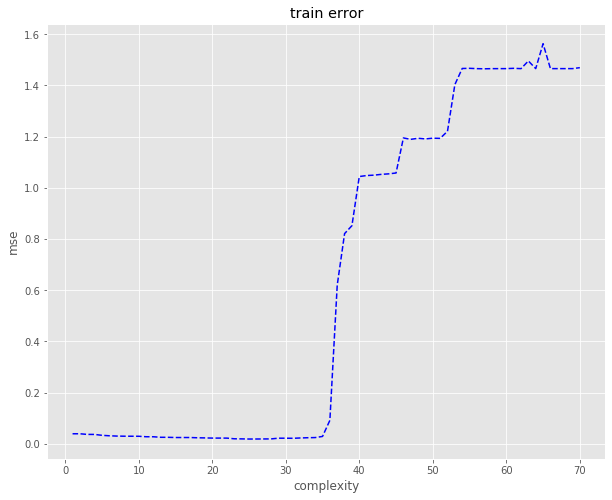

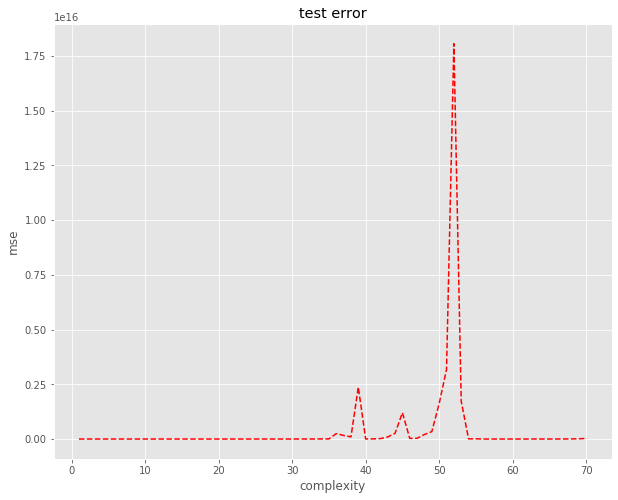

In [8]:
n = []
train_err = []
test_err = []
X_train_ = np.zeros((70, 0))
X_test_ = np.zeros((30, 0))
for i in range(1, 71):
    X_train_ = np.hstack((X_train_, X_train ** i))
    X_test_ = np.hstack((X_test_, X_test ** i))
    
    reg = LinearRegression()
    reg.fit(X_train_, y_train)
    
    y_train_pred = reg.predict(X_train_)
    y_test_pred = reg.predict(X_test_)
    
    train_err.append(mean_squared_error(y_train, y_train_pred))
    test_err.append(mean_squared_error(y_test, y_test_pred))
    n.append(i)

# 训练误差 和 测试误差 量级相差太大了，分开画图
plt.figure(figsize=(10,8))
plt.plot(n,train_err,"b--")
plt.title("train error")
plt.ylabel("mse")
plt.xlabel("complexity")

plt.figure(figsize=(10,8))
plt.plot(n,test_err,"r--")
plt.title("test error")
plt.ylabel("mse")
plt.xlabel("complexity")

print("注意y轴刻度的数量级")